<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/ml/Untitled100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-fb1a4293d6c7>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_r = pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/.github.io/master/work/ml/data_fundamental.csv', index_col='Date', parse_dates=True)


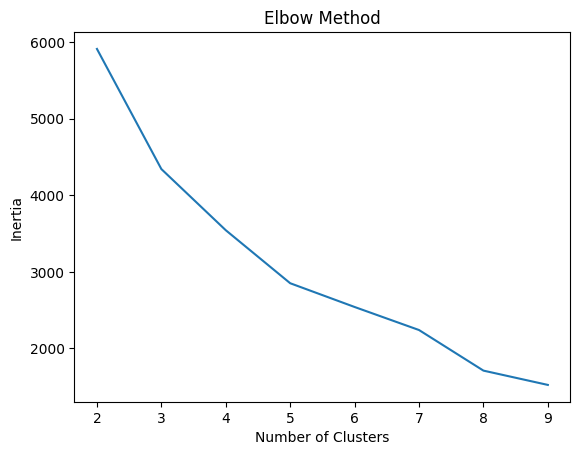

Cluster 0:
 feat_PE                  23.900000
feat_PB                   3.490000
feat_Div_Yield            1.220000
feat_dist_from_ma_150     0.067298
feat_dist_from_ma_200     0.084020
dtype: float64
Cluster 1:
 feat_PE                  24.750000
feat_PB                   4.320000
feat_Div_Yield            1.160000
feat_dist_from_ma_150     0.065963
feat_dist_from_ma_200     0.093630
dtype: float64
Cluster 2:
 feat_PE                  20.265000
feat_PB                   2.725000
feat_Div_Yield            1.640000
feat_dist_from_ma_150    -0.139634
feat_dist_from_ma_200    -0.141320
dtype: float64
Cluster 3:
 feat_PE                  21.890000
feat_PB                   3.300000
feat_Div_Yield            1.410000
feat_dist_from_ma_150    -0.029412
feat_dist_from_ma_200    -0.023474
dtype: float64
Cluster 4:
 feat_PE                  32.435000
feat_PB                   3.205000
feat_Div_Yield            1.440000
feat_dist_from_ma_150     0.102213
feat_dist_from_ma_200     0.059402
dtype

<ipython-input-1-fb1a4293d6c7>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.labels_


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your 10-year Nifty data (assuming a CSV format)
data_r = pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/.github.io/master/work/ml/data_fundamental.csv', index_col='Date', parse_dates=True)
data_r.reset_index(inplace=True)

# Feature engineering (optional)
for m in [150,200]:
    data_r[f'feat_dist_from_ma_{m}'] = data_r['Close']/data_r['Close'].rolling(m).mean()-1
'''
# Distance from n day max/min
for m in [50, 200]:
    data_r[f'feat_dist_from_max_{m}'] = data_r['Close']/data_r['High'].rolling(m).max()-1
    data_r[f'feat_dist_from_min_{m}'] = data_r['Close']/data_r['Low'].rolling(m).min()-1

# Price distance
for m in [20,50]:
    data_r[f'feat_price_dist_{m}'] = data_r['Close']/data_r['Close'].shift(m)-1
'''
data=data_r[(data_r['Date'] >= '2015-01-01') & (data_r['Date'] < '2022-11-30')]
# Select features and scale the data
features = [col for col in data_r.columns if 'feat' in col]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Determine the number of clusters (Elbow Method)
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0,n_init='auto')
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 10), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose optimal_k based on the elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=7, random_state=0, n_init='auto')
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_

# Analyze and interpret clusters
for i in range(7):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:\n", cluster_data[features].median())


In [2]:
'''
import seaborn as sns

sns.pairplot(data[features + ['Cluster']], diag_kind='kde', kind='scatter',
             markers='+', hue='Cluster', palette='viridis')
plt.show()
'''

"\nimport seaborn as sns\n\nsns.pairplot(data[features + ['Cluster']], diag_kind='kde', kind='scatter',\n             markers='+', hue='Cluster', palette='viridis')\nplt.show()\n"

In [16]:
# Analyze and interpret clusters
for i in range(7):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:\n", cluster_data[features].median())


Cluster 0:
 feat_PE                  23.900000
feat_PB                   3.490000
feat_Div_Yield            1.220000
feat_dist_from_ma_150     0.067298
feat_dist_from_ma_200     0.084020
dtype: float64
Cluster 1:
 feat_PE                  24.750000
feat_PB                   4.320000
feat_Div_Yield            1.160000
feat_dist_from_ma_150     0.065963
feat_dist_from_ma_200     0.093630
dtype: float64
Cluster 2:
 feat_PE                  20.265000
feat_PB                   2.725000
feat_Div_Yield            1.640000
feat_dist_from_ma_150    -0.139634
feat_dist_from_ma_200    -0.141320
dtype: float64
Cluster 3:
 feat_PE                  21.890000
feat_PB                   3.300000
feat_Div_Yield            1.410000
feat_dist_from_ma_150    -0.029412
feat_dist_from_ma_200    -0.023474
dtype: float64
Cluster 4:
 feat_PE                  32.435000
feat_PB                   3.205000
feat_Div_Yield            1.440000
feat_dist_from_ma_150     0.102213
feat_dist_from_ma_200     0.059402
dtype

In [4]:
data_s=data

In [5]:
data_s.reset_index(inplace=True)

In [6]:
import plotly.express as px

fig = px.scatter(
    data_s,
    x='Date',
    y='Close',
    color='Cluster',
    color_continuous_scale='rdylgn',
    title='Cluster Analysis - Training',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()


In [7]:
df_test = data_r[data_r['Date'] >= '2022-12-01'].reset_index(drop=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_test[features])

df_test['cluster'] = kmeans.predict(scaled_data)

fig = px.scatter(
    df_test,
    x='Date',
    y='Close',
    color='cluster',
    color_continuous_scale='viridis',
    title='Cluster Analysis - Testing-- LOOK FOR BOTTOMS FORMING',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()

Interpretation of Clusters from a Trader/Investor Perspective:
Based on the provided data, here's how a trader/investor might interpret each cluster:


Cluster 0 & 5: These clusters represent companies with ***moderate valuations*** based on P/E and P/B ratios. They offer a decent dividend yield and are trading close to their 150-day and 200-day moving averages. These could be considered stable investments with moderate growth potential.


Cluster 1: This cluster shows companies with ***slightly higher valuations*** than Cluster 0 & 5, with a lower dividend yield. They are also trading slightly further above their moving averages. These companies might be in a growth phase, justifying the higher valuations.


Cluster 2: This cluster stands out with lower P/E and P/B ratios, indicating potential ***undervaluation.*** Additionally, they offer the highest dividend yield among all clusters. However, they are trading significantly below their moving averages, suggesting possible negative sentiment or recent underperformance. This cluster might present value investing opportunities but requires further research into the specific companies and their underlying reasons for underperformance.


Cluster 3: Similar to Cluster 2, this cluster shows ***lower valuations*** compared to the average. However, their dividend yield is moderate, and they are trading closer to their moving averages. This cluster might represent companies in a recovery phase or experiencing temporary setbacks.


Cluster 4 & 6: These clusters exhibit the ***highest P/E ratios***, suggesting high growth expectations from investors. They offer moderate dividend yields and are trading significantly above their moving averages. These companies might be considered riskier investments due to their high valuations, but they also offer the potential for higher returns.
Overall: This clustering analysis provides a framework for quickly identifying groups of companies with similar financial characteristics. Investors can then delve deeper into specific companies within each cluster to make informed investment decisions based on their individual risk tolerance and investment goals.
Additional Considerations:
This analysis is based on a limited set of features. Other factors, such as industry, management quality, and economic conditions, should also be considered.
It's crucial to understand the specific methodology used for clustering and the limitations of the chosen algorithm.
Past performance is not necessarily indicative of future results.
Remember, this interpretation serves as a starting point for further research and should not be considered as investment advice.

#Cluster 1

***Thesis: Slightly Richer Valuations, Possibly with Growth Focus.***
Companies in this cluster might have higher growth expectations baked into their valuations. Investigate if these growth expectations are justified by strong fundamentals and future prospects.
#Cluster 2

***Thesis: Undervalued or Out-of-favor Stocks. This cluster boasts the most attractive valuations and the highest dividend yields.*** Focus on companies that might be temporarily undervalued due to short-term factors or overlooked by the market. Look for sound financials and a potential catalyst for value to be recognized.
#Cluster 3

***Thesis: Moderate Valuations, Possible Technical Opportunity. This cluster is trading slightly below its moving averages.*** Investigate if this is a temporary dip in a fundamentally strong company or the start of a longer downtrend. Technical analysis could help identify entry points if you believe in the companies' potential.
#Cluster 4

***Thesis: High Growth Potential or Overvaluation. Stocks here command the highest valuations.*** Thoroughly analyze whether the potential growth prospects of these companies justify the premium prices. Be wary of overvaluation and ensure companies have strong fundamentals to back up such valuations.
#Cluster 5

***Thesis: Mix of Growth and Value Potential.*** Moderately valued stocks with decent dividend yields could offer a combination of growth and income potential. Look for companies with stable growth trajectories and a history of rewarding shareholders.
#Cluster 6

***Thesis: Highest Growth Expectations or Overvaluation Risk.*** These stocks have the highest valuations and the farthest distance above their moving averages. Exercise caution and analyze whether the future growth prospects truly justify the high price tags. Potential for significant correction exists if expectations aren't met.

In [8]:
# Analyze and interpret clusters
for i in range(7):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:\n", cluster_data[features].mean())


Cluster 0:
 feat_PE                  24.425793
feat_PB                   3.502345
feat_Div_Yield            1.170851
feat_dist_from_ma_150     0.067934
feat_dist_from_ma_200     0.083224
dtype: float64
Cluster 1:
 feat_PE                  25.181293
feat_PB                   4.321767
feat_Div_Yield            1.167792
feat_dist_from_ma_150     0.061876
feat_dist_from_ma_200     0.088410
dtype: float64
Cluster 2:
 feat_PE                  20.607292
feat_PB                   2.719688
feat_Div_Yield            1.639062
feat_dist_from_ma_150    -0.149768
feat_dist_from_ma_200    -0.153576
dtype: float64
Cluster 3:
 feat_PE                  22.456578
feat_PB                   3.408126
feat_Div_Yield            1.401853
feat_dist_from_ma_150    -0.027792
feat_dist_from_ma_200    -0.026399
dtype: float64
Cluster 4:
 feat_PE                  32.182561
feat_PB                   3.230610
feat_Div_Yield            1.420854
feat_dist_from_ma_150     0.100429
feat_dist_from_ma_200     0.062965
dtype

In [9]:
df_test['cluster'].tail(1)

334    0
Name: cluster, dtype: int32

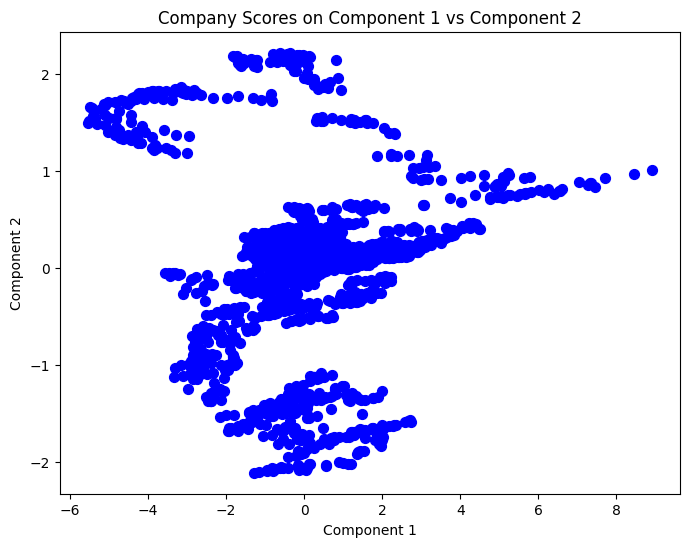

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = data[features]

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create PCA object with 3 components
pca = PCA(n_components=3)

# Fit and transform the data
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame to hold results
df_pca = pd.DataFrame(data=principal_components,
                      columns=['PC1', 'PC2', 'PC3'])

# Scatter plot of PC1 vs PC2
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', s=50)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Company Scores on Component 1 vs Component 2')
plt.show()


In [11]:
# View the 'loadings' to understand how original ratios contribute to components
print(pca.components_)




[[-0.39259982 -0.37201777  0.45045038 -0.4929495  -0.5114327 ]
 [ 0.631713   -0.69807552  0.27233897  0.17495381  0.09408449]
 [-0.48880514 -0.60974382 -0.58404742  0.16092796  0.14924077]]


In [12]:
# Calculate explained variance to see importance of each component
print(pca.explained_variance_ratio_)

[0.72042914 0.15593905 0.06532346]


<ipython-input-13-9b46738d0002>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



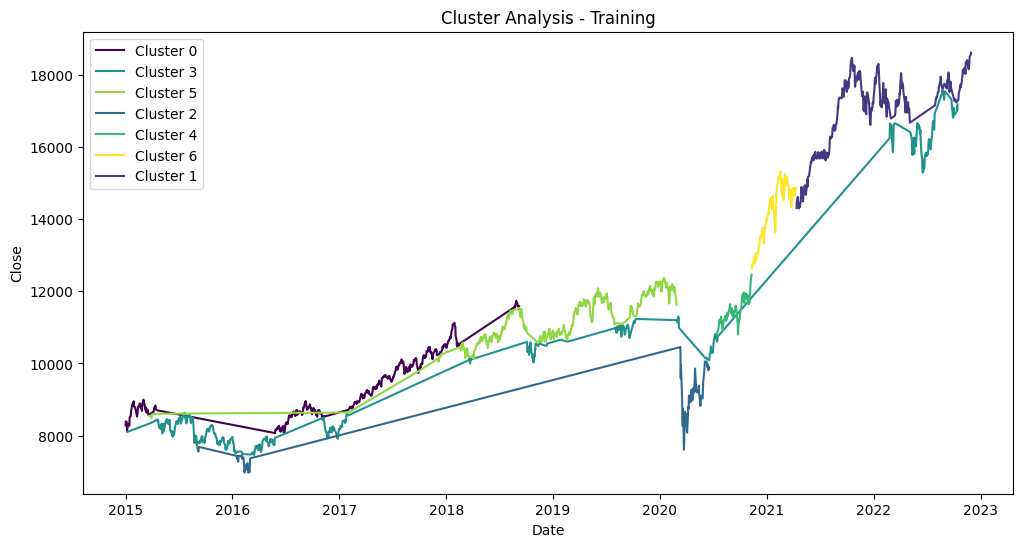

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm  # For the 'viridis' colormap

# ... (Assume your data_s DataFrame exists with 'Date', 'Close', 'Cluster')

# Extract unique clusters in order for sequential coloring
unique_clusters = data_s['Cluster'].unique()

# Get 'viridis' colormap and normalize
cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=unique_clusters.min(), vmax=unique_clusters.max())

fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colors from colormap
for i, cluster in enumerate(unique_clusters):
    cluster_data = data_s[data_s['Cluster'] == cluster]
    ax.plot(cluster_data['Date'], cluster_data['Close'],
               c=cmap(normalize(cluster)),
               label=f'Cluster {cluster}')

# Labels and aesthetics
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_title('Cluster Analysis - Training')
ax.legend()
plt.show()


<ipython-input-14-8c9dfb6599fe>:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



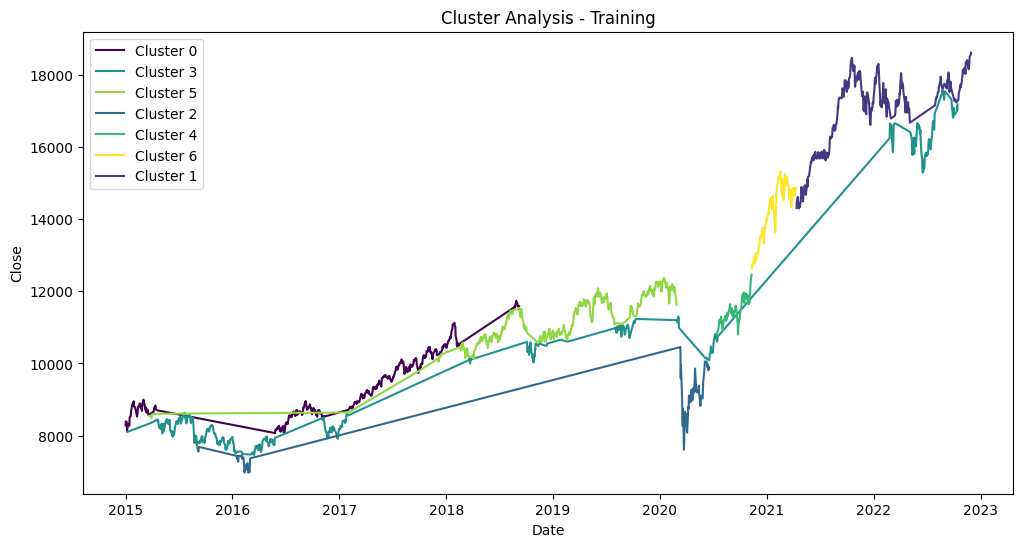

In [14]:
cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=unique_clusters.min(), vmax=unique_clusters.max())

fig, ax = plt.subplots(figsize=(12, 6))
# Line plot for each cluster
for i, cluster in enumerate(unique_clusters):
   cluster_data = data_s[data_s['Cluster'] == cluster]
   ax.plot(cluster_data['Date'], cluster_data['Close'],
           c=cmap(normalize(cluster)),
           label=f'Cluster {cluster}')
# Labels and aesthetics
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_title('Cluster Analysis - Training')
ax.legend()
plt.show()